In [1]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
import pandas as pd

In [9]:
baby = Table.read_table('test.csv')
baby

Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False
5,138,244,33,62,178,False
6,132,245,23,65,140,False
7,120,289,25,62,125,False
8,143,299,30,66,136,True
9,140,351,27,68,120,False


Question 1

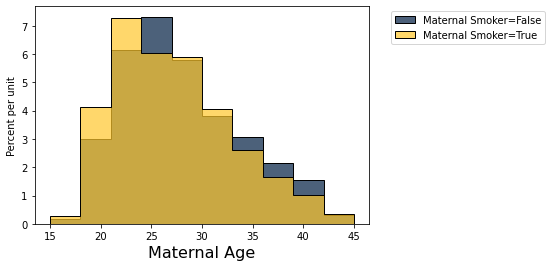

In [10]:
smoking_and_age = baby.select('Maternal Smoker', 'Maternal Age')
smoking_and_age.hist('Maternal Age', group = 'Maternal Smoker')

In [11]:
smoking_and_age.group('Maternal Smoker', np.average)

Maternal Smoker,Maternal Age average
False,27.5441
True,26.7364


histograms for the above two distributions look little different. If we closely look onto the histogram we can notice that age of smoking mothers seems to be little younger on average than the non smokers

Question 2

We can use A/B testing for this particular problem

Question 3

Ho:Null: There is no difference in the ages of the smoking and non smoking mothers

H1:Alternate: There is difference in the ages of the smoking and non smoking mothers

Question 4

A/B testing:
The statistic that I recommend is taking the difference of the average ages.
If the underlying distributions of ages in the two groups are the same, then the empirical distribution of the difference based on permuted samples will predict how the statistic will vary due to chance. then we can find whether our predicted value lies in the graph we will plot or out. Accordingly we can conclude the hypothesis.

Question 5

In [12]:
smoking_and_age.group('Maternal Smoker', np.average)

Maternal Smoker,Maternal Age average
False,27.5441
True,26.7364


We find the difference of the average

In [14]:
observed_means = smoking_and_age.group('Maternal Smoker',np.average).column(1)
observed_difference = observed_means.item(1) -observed_means.item(0)
observed_difference

-0.8076725017901509

Small values (that is, large negative values) of this statistic will favor the alternative hypothesis.

Question 6

In [17]:
shuffled_weights =smoking_and_age.sample(with_replacement =False).column(1)
original_and_shuffled =smoking_and_age.with_column('Shuffled Age',shuffled_weights)

In [18]:
original_and_shuffled

Maternal Smoker,Maternal Age,Shuffled Age
False,27,25
False,33,33
True,28,35
True,23,30
False,25,36
False,33,33
False,23,23
False,25,26
True,30,24
False,27,23


In [19]:
all_group_means = original_and_shuffled.group('Maternal Smoker',np.average)
all_group_means

Maternal Smoker,Maternal Age average,Shuffled Age average
False,27.5441,27.1832
True,26.7364,27.2985


In [20]:
shuffled_means = original_and_shuffled.group('Maternal Smoker',
np.average).column(2)
difference = shuffled_means.item(1) - shuffled_means.item(0)
difference

0.11525816231698727

we must simulate the difference many times.

In [15]:
def permuted_sample_average_difference(table, label,group_label, repetitions):
    tbl = table.select(group_label, label)
    differences = make_array()
    for i in np.arange(repetitions):
        shuffled = tbl.sample(with_replacement =False).column(1)
        original_and_shuffled = tbl.with_column('Shuffled Data',shuffled)
        shuffled_means =original_and_shuffled.group(group_label, np.average).column(2)
        simulated_difference = shuffled_means.item(1) -shuffled_means.item(0)
        differences = np.append(differences,simulated_difference)
    return differences

In [16]:
differences = permuted_sample_average_difference(baby, 'Maternal Age', 'Maternal Smoker', 5000)

Question 7

Observed Difference: -0.8076725017901509


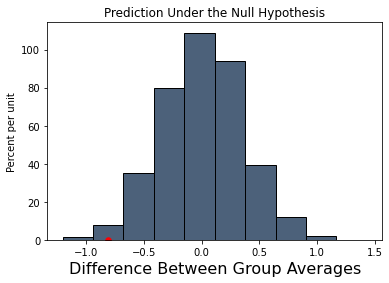

In [21]:
Table().with_column('Difference Between Group Averages',
differences).hist()
plots.scatter(observed_difference, 0, color='red', s=30)
plots.title('Prediction Under the Null Hypothesis')
print('Observed Difference:', observed_difference)

Question 8

In [22]:
empirical_P = np.count_nonzero(differences <=observed_difference) / 5000
empirical_P

0.009

Question 9

If the calculated p-value turns out to be less than 0.05, the null hypothesis is considered to be false. Here p value is 0.009 as it is less than 0.05 we say that null is to be false

The test supports the claim that the smokers were younger on
average.